# Homework for week 3
**Data:** As in the previous week. The Airbnb data from New York City. It can be downloaded from [kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)

**Objective:** We'll keep working with the 'price' variable, and we'll transform it to a classification task.

For the rest of the homework, you'll need to use the features from the previous homework with additional two ```'neighbourhood_group'``` and ```'room_type'```. So the whole feature set will be set as follows:

* ```'neighbourhood_group'```,
* ```'room_type'```,
* ```'latitude'```,
* ```'longitude'```,
* ```'price'```,
* ```'minimum_nights'```,
* ```'number_of_reviews'```,
* ```'reviews_per_month'```,
* ```'calculated_host_listings_count'```,
* ```'availability_365'```

Select only them and fill in the missing values with 0.

## Setup

In [137]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [91]:
df = pd.read_csv("../data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [92]:
columns = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
df_sel = df[columns]
df_sel.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


* Fill missing values with 0

In [93]:
# Where are missing values?
df_sel.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [94]:
# fill missing values
df_sel = df_sel.fillna(0)
df_sel.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Question 1

What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [95]:
nu = df_sel["neighbourhood_group"].unique()
for i in nu:
    print(f"{i}: {df_sel['neighbourhood_group'].value_counts()[i]}")

Brooklyn: 20104
Manhattan: 21661
Queens: 5666
Staten Island: 373
Bronx: 1091


* The most frequent observation is "Manhattan".
* Alternative:

In [96]:
df_sel["neighbourhood_group"].mode()

0    Manhattan
dtype: object

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the ````train_test_split``` function) and set the seed to 42.
* Make sure that the target value (```'price'```) is not in your dataframe.

In [97]:
df_train_full, df_test = train_test_split(df_sel, test_size=0.2, random_state=42, shuffle=True)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42, shuffle=True)

In [98]:
print(f"df_train_full length: {len(df_train_full)}, df_train length: {len(df_train)}, df_val length: {len(df_val)}, df_test length: {len(df_test)}")

df_train_full length: 39116, df_train length: 29337, df_val length: 9779, df_test length: 9779


In [99]:
# Define target
y_train_full = df_train_full.price 
y_train = df_train.price 
y_val = df_val.price 
y_test = df_test.price 

In [100]:
del df_train_full["price"]
del df_train["price"]
del df_val["price"]
del df_test["price"]

In [101]:
df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [102]:
df_train_full.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Entire home/apt,40.71577,-73.95530,3,11,0.87,1,1
1,Manhattan,Private room,40.84917,-73.94048,2,2,0.16,1,0
2,Brooklyn,Private room,40.68993,-73.95947,2,0,0.00,2,0
3,Brooklyn,Entire home/apt,40.68427,-73.93118,3,87,4.91,1,267
4,Queens,Private room,40.74705,-73.89564,5,13,0.25,1,0


## Question 2

* Create the correlation matrix for the numerical features of your train dataset.
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?


In [103]:
df_train.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [104]:
numerical = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "reviews_per_month", 
             "calculated_host_listings_count", "availability_365"]
categorical = ["neighbourhood_group", "room_type"]

In [105]:
corr_matrix = df_train[numerical].corr()
corr_matrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


In [106]:
# sort values
s = corr_matrix.unstack()
so = s.sort_values(ascending=False)
so

latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
minimum_nights                  minimum_nights                    1.000000
number_of_reviews               number_of_reviews                 1.000000
availability_365                availability_365                  1.000000
number_of_reviews               reviews_per_month                 0.590374
reviews_per_month               number_of_reviews                 0.590374
availability_365                calculated_host_listings_count    0.225913
calculated_host_listings_count  availability_365                  0.225913
availability_365                number_of_reviews                 0.174477
number_of_reviews               availability_365                  0.174477
availability_365         

* Answer: The highest correlation is between "reviews_per_month" and "number_of_reviews"

## Make price binary

* We need to turn the price variable from numeric into binary.
* Let's create a variable ```above_average``` which is ```1``` if the price is above (or equal to) ```152```.

In [107]:
above_average_train_full = (y_train_full >= 152).astype(int).values
above_average_train = (y_train >= 152).astype(int).values
above_average_val = (y_val >= 152).astype(int).values
above_average_test = (y_test >= 152).astype(int).values
above_average_train

array([0, 0, 0, ..., 1, 0, 0])

## Question 3

* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using ```round(score, 2)```

In [108]:
for c in categorical:
    print(f"{c}: {mutual_info_score(above_average_train, df_train[c])}")

neighbourhood_group: 0.04650605348506435
room_type: 0.14322617342090396


* Answer: The mutual score between ```"room_type"``` and ```above_average"``` is higher than the mutual score between ```"neighbourhood_group"``` and ```"above_average"```.

## Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * ```model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)```
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [109]:
# convert dataframe to dictionary
dicts_train_full = df_train_full[categorical+numerical].to_dict(orient="records")
dicts_train = df_train[categorical+numerical].to_dict(orient="records")
dicts_val = df_val[categorical+numerical].to_dict(orient="records")
dicts_test = df_test[categorical+numerical].to_dict(orient="records")

In [110]:
# one-hot encoding
dv = DictVectorizer()
dv.fit(dicts_train)

DictVectorizer()

In [111]:
dv.get_feature_names()

/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [112]:
X_train = dv.transform(dicts_train)
X_val = dv.transform(dicts_val)

In [113]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, above_average_train)

/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [114]:
# predictions
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03145732, 0.57807102, 0.41602726, ..., 0.09248241, 0.03240703,
       0.63858722])

In [115]:
y_dec = (y_pred > 0.5)
y_dec

array([False,  True, False, ..., False, False,  True])

In [116]:
# compare to real values
(y_dec == above_average_val).mean()

0.7862767154105736

* The accuracy on the validation set is ~79%

## Question 5
 
* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * ```neighbourhood_group```
    * ```room_type```
    * ```number_of_reviews```
    * ```reviews_per_month```

**note:** the difference doesn't have to be positive

In [117]:
numerical+categorical

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group',
 'room_type']

In [118]:
acc_list = []
del_feat = []
for f in ['latitude',
         'longitude',
         'minimum_nights',
         'number_of_reviews',
         'reviews_per_month',
         'calculated_host_listings_count',
         'availability_365',
         'neighbourhood_group',
         'room_type']:
    
    list_all = numerical+categorical
    list_all.remove(f)
    
    del_feat.append(f)
    print(f"feature deleted: {f}")
    
    dicts_train = df_train[list_all].to_dict(orient="records")
    dicts_val = df_val[list_all].to_dict(orient="records")
    
    dv = DictVectorizer()
    dv.fit(dicts_train)
    
    X_train = dv.transform(dicts_train)
    X_val = dv.transform(dicts_val)
    
    # fit model
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, above_average_train)
    
    # predictions
    y_pred = model.predict_proba(X_val)[:,1]
    y_dec = (y_pred > 0.5)
    
    # accuracy
    acc = (y_dec == above_average_val).mean()
    
    print(f"Accuracy: {acc}")
    
    acc_list.append(acc)

feature deleted: latitude


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7863789753553533
feature deleted: longitude


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7867880151344718
feature deleted: minimum_nights


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7852541159627774
feature deleted: number_of_reviews


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7865834952449126
feature deleted: reviews_per_month


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7851518560179978
feature deleted: calculated_host_listings_count


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7866857551896922
feature deleted: availability_365


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7815727579507107
feature deleted: neighbourhood_group
Accuracy: 0.7509970344616014
feature deleted: room_type
Accuracy: 0.7161263932917477


/home/jens/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
list(zip(del_feat,acc_list))

[('latitude', 0.7863789753553533),
 ('longitude', 0.7867880151344718),
 ('minimum_nights', 0.7852541159627774),
 ('number_of_reviews', 0.7865834952449126),
 ('reviews_per_month', 0.7851518560179978),
 ('calculated_host_listings_count', 0.7866857551896922),
 ('availability_365', 0.7815727579507107),
 ('neighbourhood_group', 0.7509970344616014),
 ('room_type', 0.7161263932917477)]

* Answer: The least useful feature is ```room_type```

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column ```'price'```. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter ```alpha```. Let's try the following values: ```[0, 0.01, 0.1, 1, 10]```
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest ```alpha```.

* Ridge model: Linear least squares with l2 regularization.

In [129]:
# default alpha
model = Ridge(alpha=1)
# log transformation
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
model.fit(X_train, y_train_log)

Ridge(alpha=1)

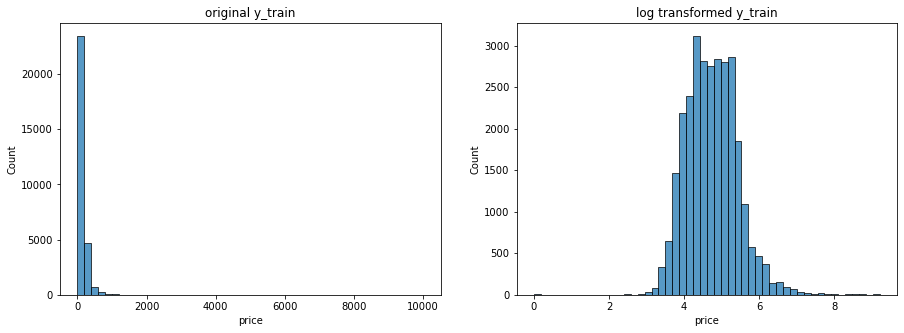

In [147]:
# compare y_train and y_train_log
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].set_title("original y_train")
sns.histplot(y_train, ax=axes[0], bins=50)
axes[1].set_title("log transformed y_train")
sns.histplot(y_train_log, ax=axes[1], bins=50);

In [130]:
y_pred = model.predict(X_val)

In [131]:
mean_squared_error(y_pred, y_val_log, squared=False)

0.6425579972863262

In [132]:
# Try different alpha
alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    rmse = mean_squared_error(y_pred, y_val_log, squared=False)
    print(f"alpha: {a}, RMSE: {round(rmse, 3)}")

alpha: 0, RMSE: 157.299
alpha: 0.01, RMSE: 157.299
alpha: 0.1, RMSE: 157.298
alpha: 1, RMSE: 157.297
alpha: 10, RMSE: 157.285


* Answer: The lowest RMSE is alpha = 10